In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Importing to use singular value decomposition.
from scipy import linalg

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

%matplotlib inline

In [4]:
data = loadmat('ex7data2.mat')
data.keys()

X = data['X']

# Taking a look at some values.
X_rand = X[np.random.randint(X.shape[0],size=5)]

<b> K-Means Clustering </b> <br>
Import to note that K-means clustering is usually done with several different random initializations as sometimes the resulting solution is not ideal. The lowest distortion (cost function value) is selected among the initializations. 

Clusters are:
[[ 1.95399466  5.02557006]
 [ 3.04367119  1.01541041]
 [ 6.03366736  3.00052511]]


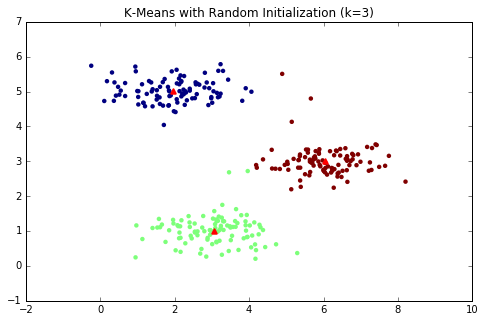

In [5]:
# Can set init to k-means++, random or a supplied ndarray. k-means++ is optimized for faster convergence.
# Trying out random for now.
clf = KMeans(3, init='random')
kmeans = clf.fit(X)

# Get labels of what is computed.
#print vars(kmeans)

plt.figure(figsize=(8,5))
plt.scatter(X[:,0:1], X[:,1:2], c=kmeans.labels_, lw=0)
plt.scatter(kmeans.cluster_centers_[:,0:1], kmeans.cluster_centers_[:,1:2], lw=2, marker='^', color='red')

plt.title('K-Means with Random Initialization (k=3)')
print 'Clusters are:\n', kmeans.cluster_centers_

<b> Image Compression with K-Means </b> <br>
Have 3-dimensional data (x,y,color_vector) and use clustering to assign like colors to their closest centroid to save storage data. 128*128*24 vs 128*128*4 + 16*24 (the 'dictionary' of colors, centroid_value:c(i)).<br>

(128, 128, 3)


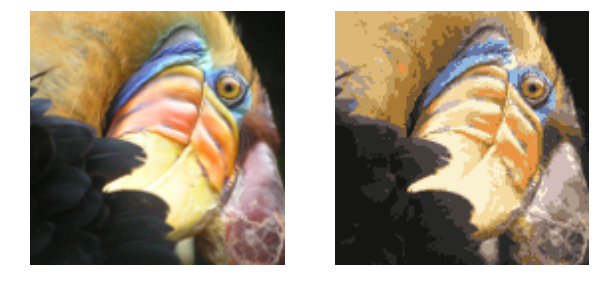

In [19]:
data2 = plt.imread('bird_small.png')

from __future__ import division
# Step taken in the supplied MATLAB code to make sure all values are between 0-1 and reshaped to work with KMeans().
data2 = data2/255
reshaped_data = data2.reshape(128*128, 3)

clf1 = KMeans(16)
kmeans1 = clf1.fit(reshaped_data)

reduced = kmeans1.cluster_centers_[kmeans1.labels_]
reduced = reduced.reshape(128,128,3)

reduced = reduced*255

fig, ax = plt.subplots(1,2,figsize=(10,5))
for x in ax:
    x.axis('off')
ax[0].imshow(data2*255)
ax[1].imshow(reduced)

<b> Implementing PCA </b>

{'scale_': array([ 1.16126017,  1.01312201]), 'with_mean': True, 'var_': array([ 1.34852518,  1.02641621]), 'mean_': array([ 3.98926528,  5.00280585]), 'with_std': True, 'n_samples_seen_': 50, 'copy': True}


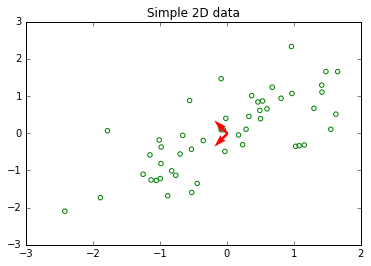

In [7]:
data3 = loadmat('ex7data1.mat')
X1 = data3['X']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X1)
print vars(scaler)
X1_scaled = scaler.transform(X1)

# Compute covariance matrix.
m = X1_scaled.shape[0]
sigma = (1/m) * X1_scaled.T.dot(X1_scaled)

# Can use PCA from sklearn but doing it manually.
U,S,V = linalg.svd(sigma)

plt.scatter(X1_scaled[:,0:1], X1_scaled[:,1:2], marker='o', facecolors='none', edgecolors='g')
plt.title('Simple 2D data')
# Had a hard time figuring out using scale argument so just left it without it.
plt.quiver(0, 0, U[0,0], U[0,1], color='r')
plt.quiver(0, 0, U[1,0], U[1,1], color='r')

In [8]:
# Projecting the data.
U_reduce = U[:,0:1]
X1_projected = X1_scaled.dot(U_reduce)
print X1_projected[0:1,:]

[[ 1.49631261]]


In [9]:
# Recovering an approximation.
X1_recovered = X1_projected.dot(U_reduce.T)
print X1_recovered[0:1,:]

[[-1.05805279 -1.05805279]]


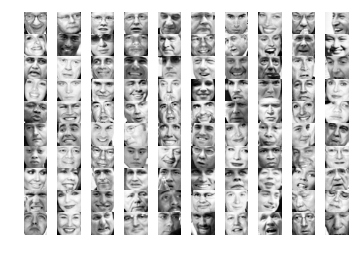

In [36]:
data4 = loadmat('ex7faces.mat')
X2 = data4['X']

# Instead of for i, for j - using itertools.product which is more efficient than a nested loop
import itertools

fig, axes = plt.subplots(10, 10)
fig.subplots_adjust(wspace=0, hspace=0)

for i, j in itertools.product(range(10),range(10)):
    ax = axes[i][j]
    ax.set_axis_off()
    ax.set_aspect('equal')
    
    # i*10 + j for 0-10, 11-20, etc.
    face = X2[(i*10)+j].reshape(32,32).T
    
    ax.imshow(face, cmap='Greys_r')


In [42]:
scaler = StandardScaler().fit(X2)
X2_scaled = scaler.transform(X2)

pca = PCA(n_components=100).fit(X2)
X2_projected = pca.transform(X2)

print X2_projected.shape

(5000, 100)
